Analyzing Employee Trends to Reduce Attrition Problem: Our company is experiencing a concerning level of employee churn. We need to understand the underlying reasons for this attrition to develop effective retention strategies.

Solution: Data is our key! By analyzing employee trends, we can identify patterns and factors contributing to departures.

What to Explore:

Demographics: Are specific age groups, departments, or job roles more likely to leave?
Performance: Is there a correlation between performance ratings and attrition?
Engagement: Are disengaged employees more likely to exit? Analyze surveys, pulse checks, and exit interviews.
Compensation & Benefits: Are certain pay scales or benefit offerings associated with higher attrition?
Internal Mobility: Do employees seek opportunities within the company before leaving?
External Factors: Are industry trends or competitor offerings influencing our attrition rate?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
pd.set_option('display.max_columns', None)


In [2]:

data_df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
data_df.shape

(1470, 35)

In [4]:
data_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#the minimum age is 18,so 'Over18' column can be dropped
#The 'EmployeeCount' column consists of all 1's, std=0, we dont need this column
#The same with 'StandardHours' column consits of all 40's, they are all identical indicated by the standard deviation being 0, we can drop this column as well
#The 'EmployeeNumber' column is merely the number for each employee, we dont need the column

In [5]:
data_df.describe().round(0).transpose()


,count,mean,std,min,25%,50%,75%,max
Age,1470.0,37.0,9.0,18.0,30.0,36.0,43.0,60.0
DailyRate,1470.0,802.0,404.0,102.0,465.0,802.0,1157.0,1499.0
DistanceFromHome,1470.0,9.0,8.0,1.0,2.0,7.0,14.0,29.0
Education,1470.0,3.0,1.0,1.0,2.0,3.0,4.0,5.0
EmployeeCount,1470.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,1025.0,602.0,1.0,491.0,1020.0,1556.0,2068.0
EnvironmentSatisfaction,1470.0,3.0,1.0,1.0,2.0,3.0,4.0,4.0
HourlyRate,1470.0,66.0,20.0,30.0,48.0,66.0,84.0,100.0
JobInvolvement,1470.0,3.0,1.0,1.0,2.0,3.0,3.0,4.0
JobLevel,1470.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0


In [6]:
data_df.describe(include = 'object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [7]:
#most employees r sales executive, more male employees. RnD has the most employees, more employees r married

In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
#All columns has 1470 non-null entries, no missing values

<Axes: >

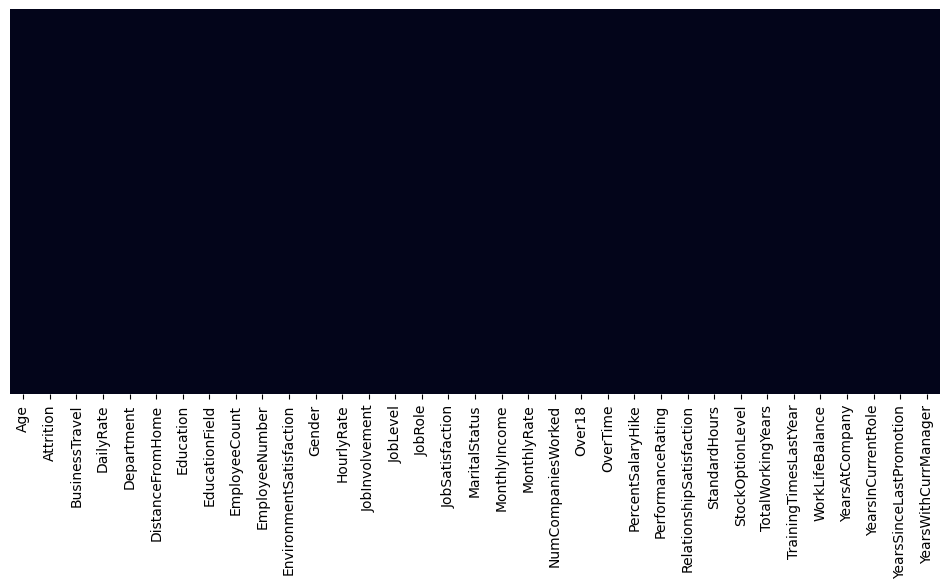

In [10]:
#heatmap to check for missing values
plt.figure(figsize=(12,5))
sns.heatmap(data_df.isnull(),
            yticklabels=False,
            cbar=False)

Text(0, 0.5, 'Attrition Rate')

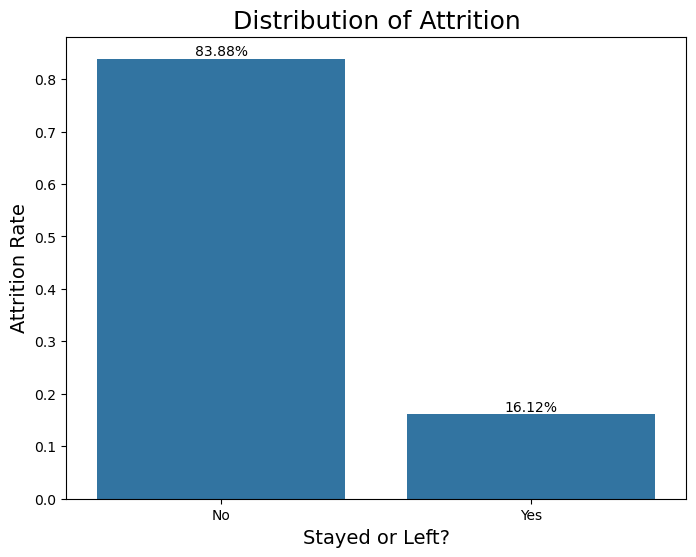

In [11]:
#we are doing binary classification problem here. Our target variable is Attrition. 
#First look at the distribution of attrition using the bar plot below

attr_rate=data_df['Attrition'].value_counts(normalize=True)

plt.figure(figsize=(8,6))

b=sns.barplot(x=data_df.Attrition.value_counts(normalize=True).index, y=data_df.Attrition.value_counts(normalize=True))

for p in b.patches:
    b.annotate(f'{p.get_height() * 100:.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
b.axes.set_title("Distribution of Attrition",fontsize=18)
b.set_xlabel("Stayed or Left?",fontsize=14)
b.set_ylabel("Attrition Rate",fontsize=14)
#b.bar_label(b.containers[0])


#As can be seen from the figure we have imbalance data set with 83.88% of employee choose to stay (Attrition=No), while the remaining 16.12% chose to leave the company (Attrition=Yes)

attr_rate.head()

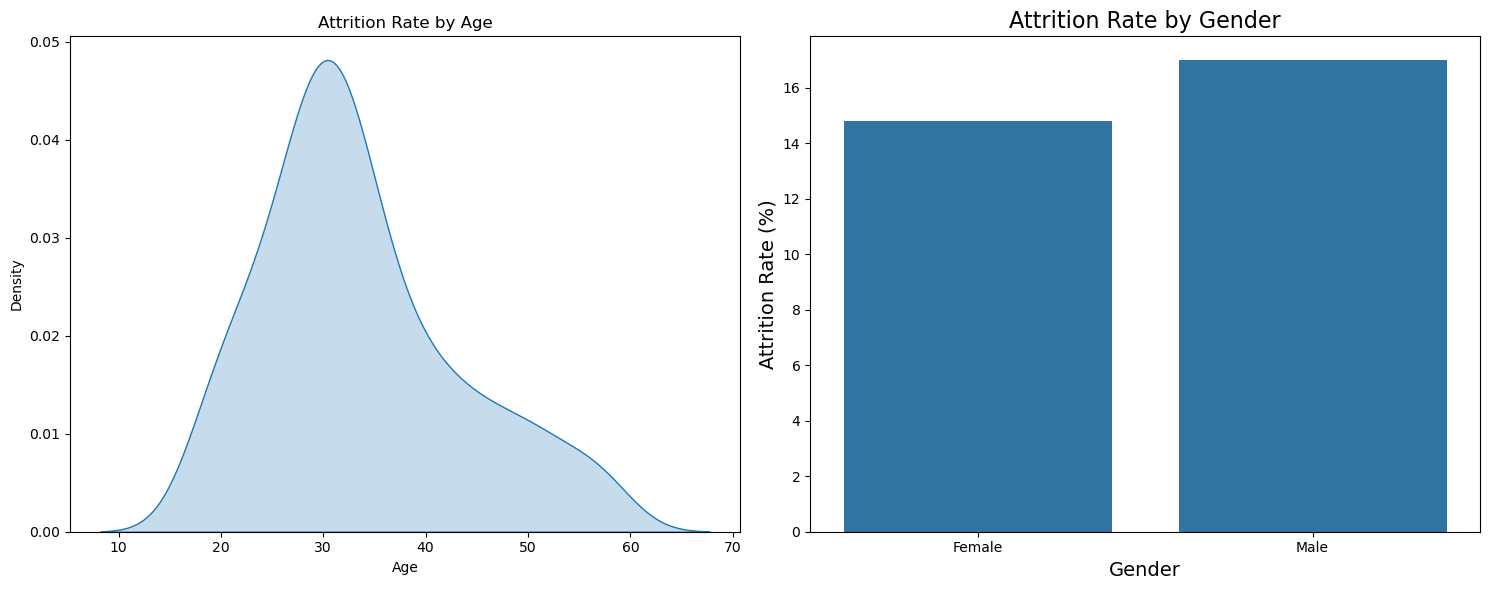

In [12]:
data_df1=data_df.copy()
df_attrition = data_df1[data_df1['Attrition'] == 'Yes']
# function to calculate attrition rate
def calculate_attrition_rate(df, column):
    attrition_counts = data_df1.groupby([column, 'Attrition']).size().unstack(fill_value=0)
    attrition_rate = attrition_counts['Yes'] / attrition_counts.sum(axis=1) * 100
    attrition_rate_df = attrition_rate.reset_index()
    attrition_rate_df.columns = [column, 'AttritionRate']
    return attrition_rate_df

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

# Plot 1: KDE plot of Attrition Rate by Age 
sns.kdeplot(data=df_attrition, x='Age', fill=True, ax=axes[0])
axes[0].set_title('Attrition Rate by Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Density')

# Plot 2: Bar plot of Attrition Rate by Gender 
attrition_rate_df = calculate_attrition_rate(data_df1, 'Gender')
sns.barplot(data=attrition_rate_df, x='Gender', y='AttritionRate', ax=axes[1])
axes[1].set_title(f'Attrition Rate by Gender',fontsize=16)
axes[1].set_xlabel('Gender',fontsize=14)
axes[1].set_ylabel('Attrition Rate (%)',fontsize=14)

plt.tight_layout()
plt.show()

Attrition by Age:

Younger employees, especially those in the 30-35 age group, appear to be more likely than other age groups to leave a company. This could be due to a number of factors, including a search for new experiences, dissatisfaction with salary or career path, or a more attractive job offer elsewhere. Older employees tend to have greater job stability. This may be due to a number of factors, such as a higher level of commitment to the company, the difficulty of finding a new job at an older age, or the existence of mandatory retirement benefits. Attrition by Gender There is a significant difference in turnover rates between men and women. Male employees tend to leave more often than female employees. However, this could be due to the imbalance in the sample of both groups.

<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

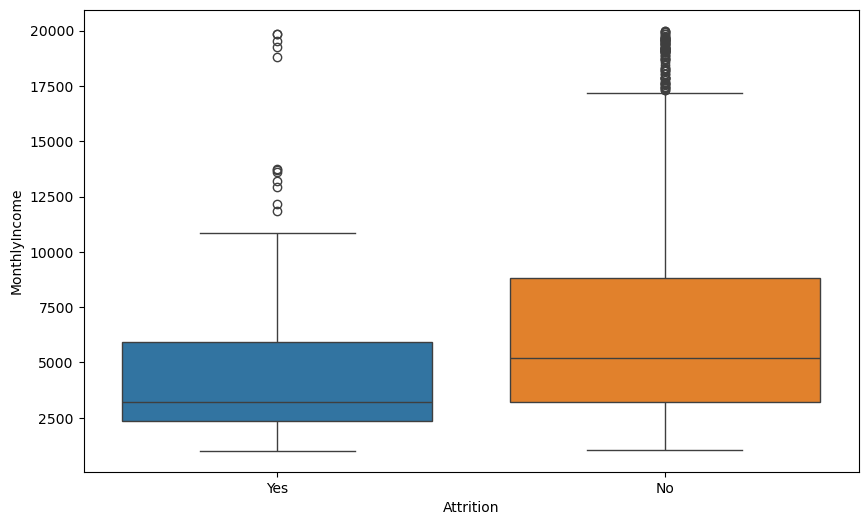

In [13]:
# Plot 1: Bobplot of Attrition Rate by Monthly Income

plt.figure(figsize =(10, 6))
sns.boxplot(y ='MonthlyIncome',x ='Attrition',data=data_df1,hue="Attrition")

In [14]:
#obviouly lower monthly income will lead to higher attrition rate

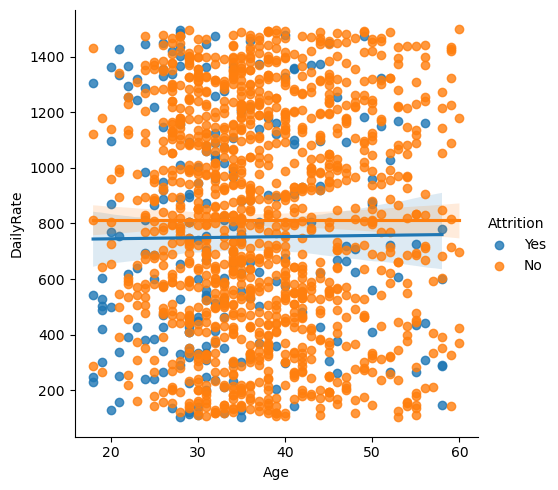

In [15]:
sns.lmplot(x = 'Age',y = 'DailyRate',hue = 'Attrition',data=data_df1)


In [16]:
#cant see the pattern cleary here

In [17]:
#data_df1=data_df.copy()
education_map = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}

data_df1['Education_cat'] = data_df1['Education'].replace(education_map)
data_df1['Education_cat']

0             College
1       Below College
2             College
3              Master
4       Below College
            ...      
1465          College
1466    Below College
1467         Bachelor
1468         Bachelor
1469         Bachelor
Name: Education_cat, Length: 1470, dtype: object

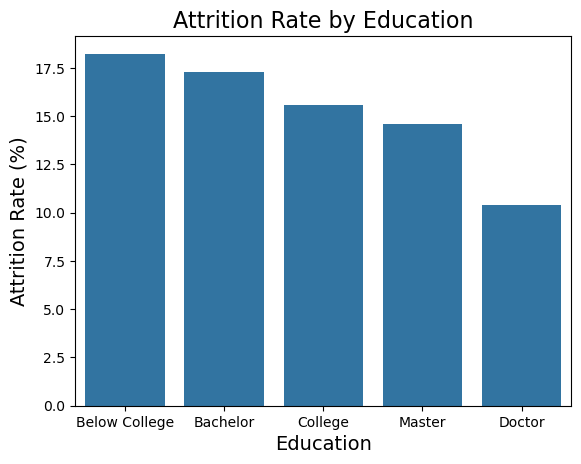

In [18]:
attrition_rate_df = calculate_attrition_rate(data_df1, 'Education_cat')
attrition_rate_df = attrition_rate_df.sort_values(by='AttritionRate', ascending=False)
sns.barplot(data=attrition_rate_df, x='Education_cat', y='AttritionRate')
plt.title(f'Attrition Rate by Education',fontsize=16)
plt.xlabel('Education',fontsize=14)
plt.ylabel('Attrition Rate (%)',fontsize=14)

plt.show()

#attrition rate breakdown by education level shows highest education (doctor) has the lowest attrion rate, below college has the highest attrition rate

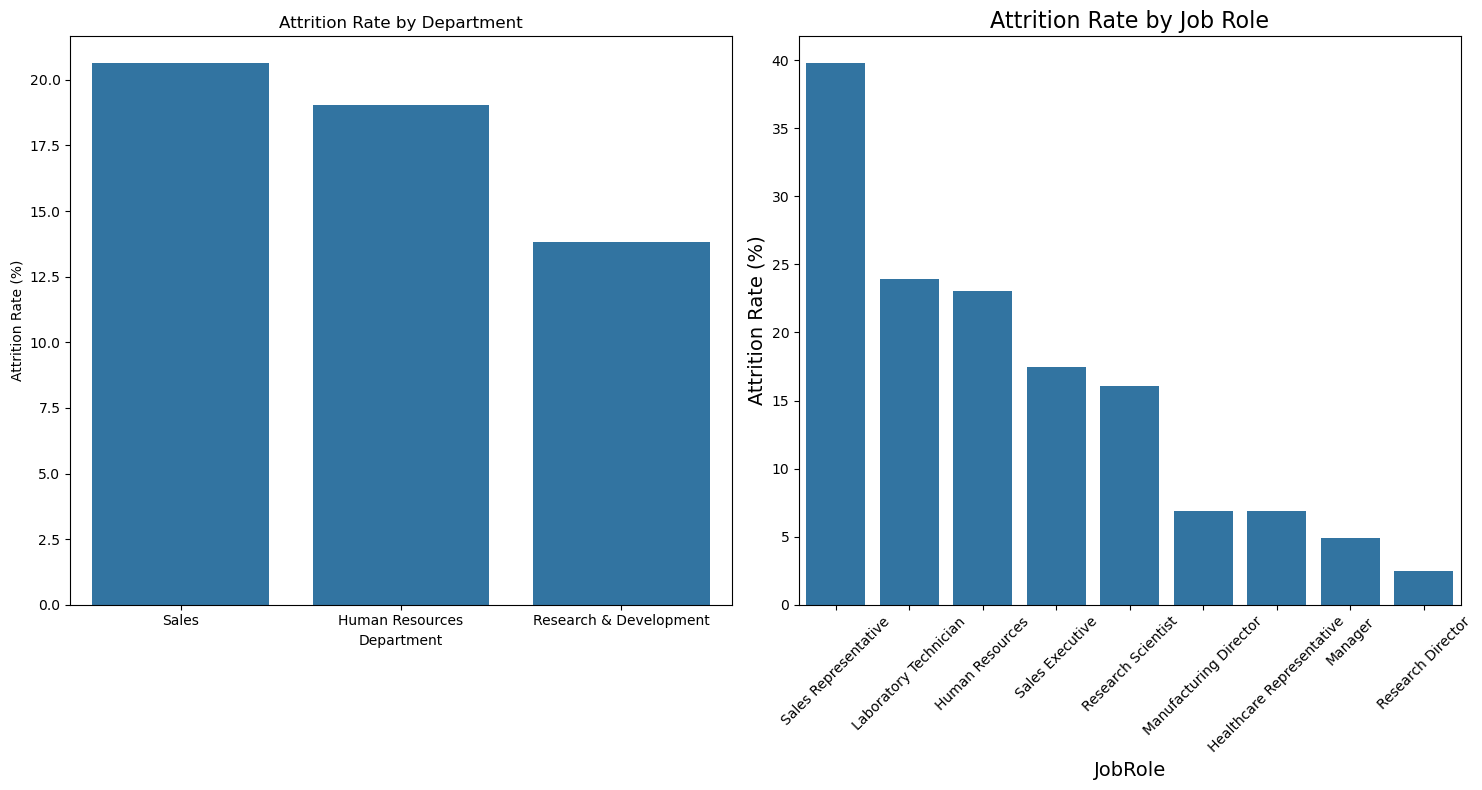

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,8))

# Plot 1: KDE plot of Attrition Rate by Dept
attrition_rate_df = calculate_attrition_rate(data_df1, 'Department')
attrition_rate_df = attrition_rate_df.sort_values(by='AttritionRate', ascending=False)
sns.barplot(data=attrition_rate_df, x='Department', y='AttritionRate', ax=axes[0])
axes[0].set_title(f'Attrition Rate by Department')
axes[0].set_xlabel('Department')
axes[0].set_ylabel('Attrition Rate (%)')

# Plot 2: Bar plot of Attrition Rate by Job Role
attrition_rate_df = calculate_attrition_rate(data_df1, 'JobRole')
attrition_rate_df = attrition_rate_df.sort_values(by='AttritionRate', ascending=False)
sns.barplot(data=attrition_rate_df, x='JobRole', y='AttritionRate', ax=axes[1])
axes[1].set_title(f'Attrition Rate by Job Role',fontsize=16)
axes[1].set_xlabel('JobRole',fontsize=14)
axes[1].set_ylabel('Attrition Rate (%)',fontsize=14)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

The sales department and the positions of sales representative and lab technician have high turnover rates. This may be due to factors such as high work pressure, unattainable sales goals, or lack of job satisfaction. The research and development department and the positions of research scientist and research director have low turnover rates. This may be due to the challenging nature of the work, greater opportunities for career development, or a more supportive work environment.

Based on the analysis of the above chart, it can be concluded that the turnover rate is influenced by the department and position held. Employees in the sales department and those holding the positions of sales representative and laboratory technician tend to leave the company more often than employees in the research and development department and those holding the positions of research scientist and research director. This difference may be due to factors such as job pressure, career development opportunities, and job satisfaction

#Exploring what factors strongly affect attrition rate.
#we have our categorical columns we want to explore how important it is to the attrition rate: \
#JobInvolvement, Environment Satisfaction, Job Satisfaction, Relationship Satisfaction, Work-Life Balance.

#Hypothesis: It is likely that the "Low" rating within each category will exhibit a higher attrition rate.
#This assumption is based on the notion that these attributes can directly impact an individual's decision to leave the company. 
#They are closely linked to satisfaction with the job involment , work-life balance. etc

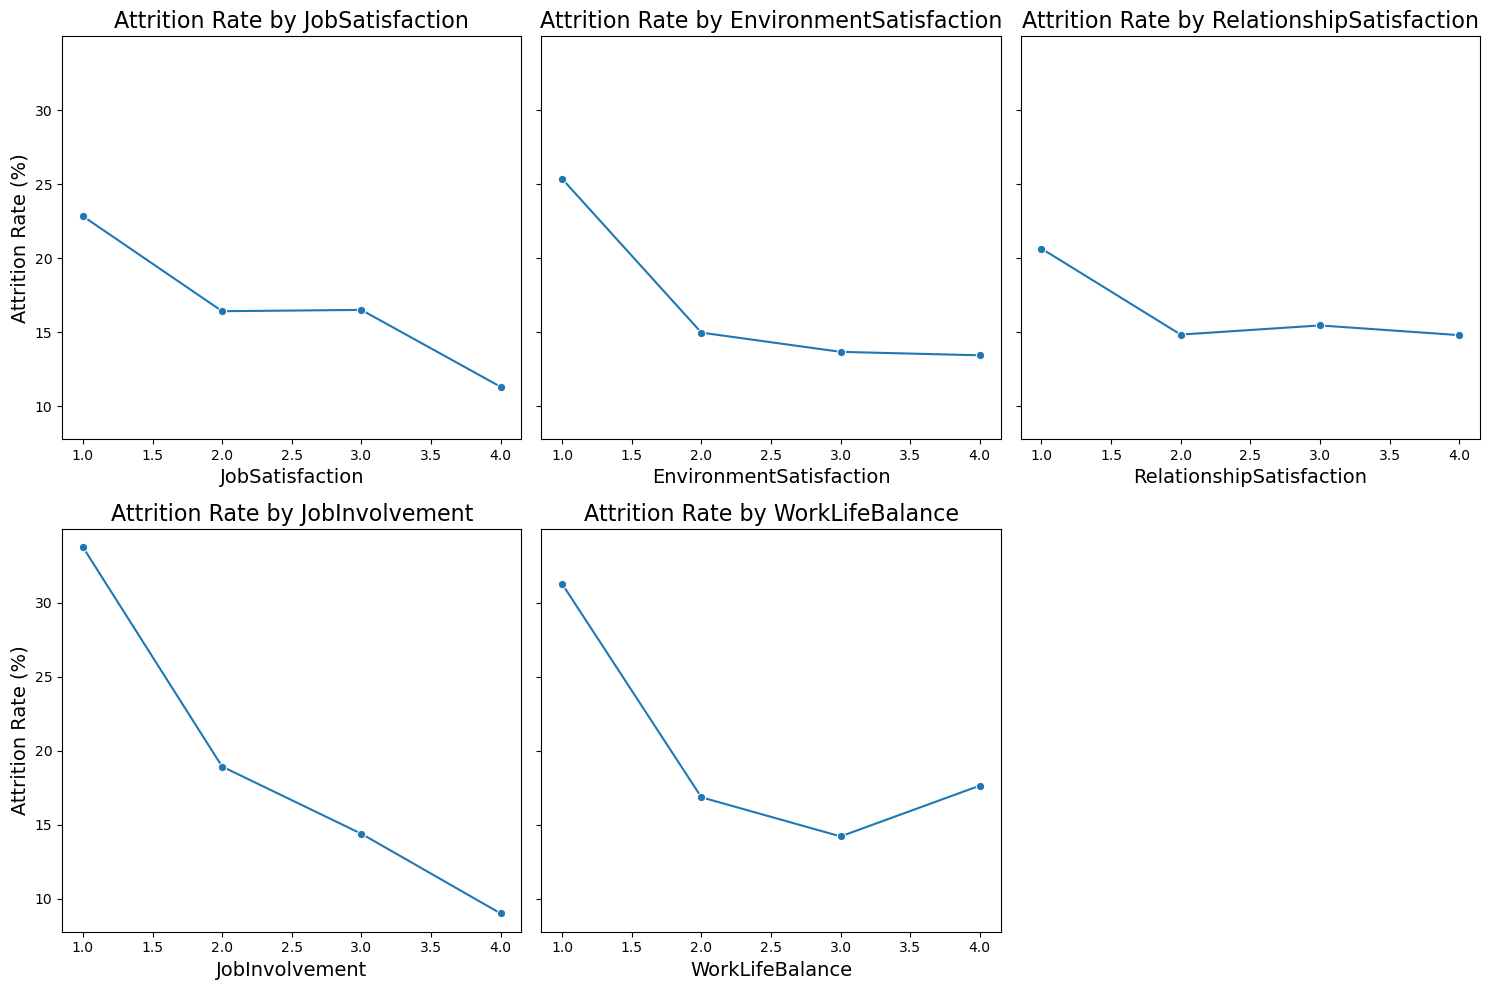

In [20]:
#List of satisfaction related columns
satisfaction_cols = [
    'JobSatisfaction', 'EnvironmentSatisfaction',
    'RelationshipSatisfaction', 'JobInvolvement',
    'WorkLifeBalance'
]

fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey=True)

# Flatten axes
axes = axes.flatten()

# Plot indiviually
for i, col in enumerate(satisfaction_cols):
    attrition_rate_df = calculate_attrition_rate(data_df1, col)
    sns.lineplot(data=attrition_rate_df, x=col, y='AttritionRate', marker='o', ax=axes[i])
    axes[i].set_title(f'Attrition Rate by {col}',fontsize=16)
    axes[i].set_xlabel(col,fontsize=14)
    axes[i].set_ylabel('Attrition Rate (%)',fontsize=14)

if len(satisfaction_cols) % 2 != 0:
    fig.delaxes(axes[-1])

# padding between plots
plt.tight_layout()
plt.show()

#EnvironmentSatisfaction affect on the Attrition rate #environment satisfaction strongly related to attrition. when environment satisfaction is low, the employees likely to leave and vice versa #How JobInvolvement affect the attrition rate #when the job involment is high, the attrition is low and vice versa Job Satisfaction: Employees with low levels of job satisfaction tend to leave more often. This suggests that aspects of the job itself, such as tasks, responsibilities, and challenges, strongly influence an employee's decision to stay or leave. Environmental Satisfaction: A work environment that is uncomfortable, unsupportive, or inconsistent with an employee's values may encourage them to seek employment elsewhere. Relationship satisfaction: Good relationships with co-workers and supervisors can increase a sense of belonging and loyalty to the organization, thereby reducing turnover. Job Involvement: Employees who feel engaged in their work tend to be more loyal and committed to the organization. Work-life balance: A good work-life balance is very important to employees. Employees who feel that their work interferes with their personal lives are more likely to leave the company. In addition, the results of the analysis show a strong correlation between the level of job involvement and the level of turnover. Employees with low levels of job involvement tend to leave the organization more frequently. This suggests that a lack of job involvement, which may be caused by a lack of career development opportunities or a lack of challenge in the job, may encourage employees to seek more fulfilling work elsewhere.

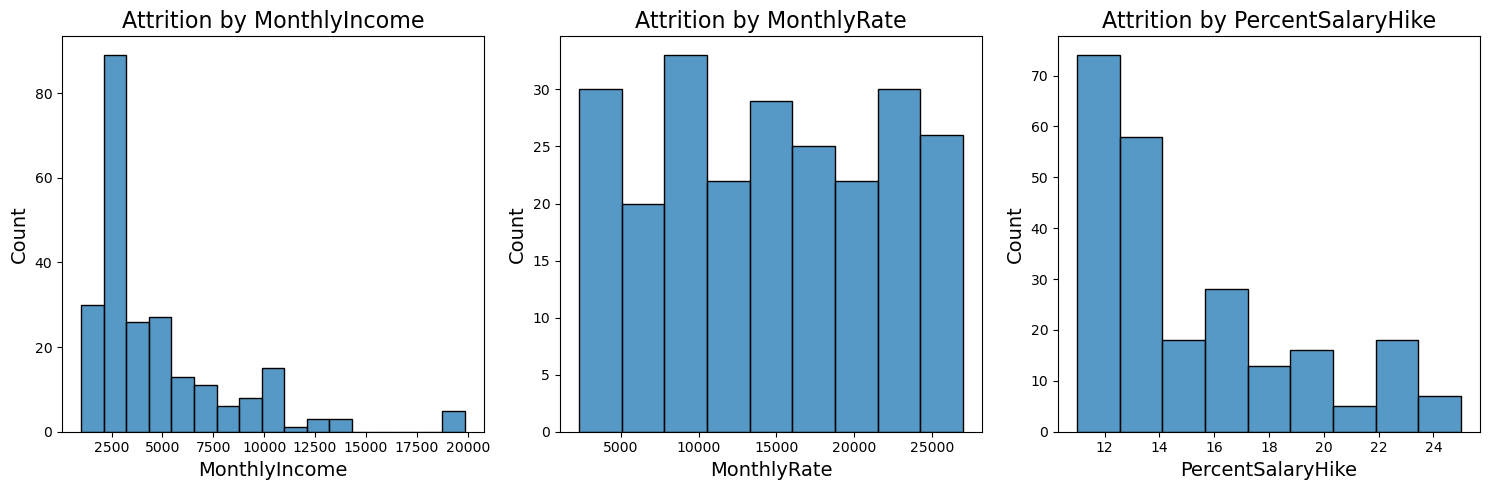

In [21]:
#Let's look at salary and benefit related factors
salary_col = ['MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

for i, col in enumerate(salary_col):
    sns.histplot(data=df_attrition, x=col, ax=axes[i])
    axes[i].set_title(f'Attrition by {col}',fontsize=16)
    #axes[i].set_xlabel(col,fontsize=14)
    axes[i].set_xlabel(col,fontsize=14)
    axes[i].set_ylabel('Count',fontsize=14)
    
plt.tight_layout()
plt.show()

Turnover by monthly income

This chart shows that most of the employees who left had a monthly income in the range of 5,000 to 7,500. There is a significant decrease in the turnover rate for employees with a monthly income above 7,500, indicating that employees with higher salaries tend to stay with the company longer. Turnover by Monthly Rate: The Turnover by Monthly Rate graph does not show a clear pattern between salary levels and turnover rates. Turnover fluctuates randomly across different salary ranges.

Turnover by Percent Salary Increase:

This chart shows that employees who receive lower salary increases (below 16%) tend to have higher turnover rates. The higher the percentage increase, the lower the turnover rate. This shows that a significant salary increase can be an effective retention factor.

<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

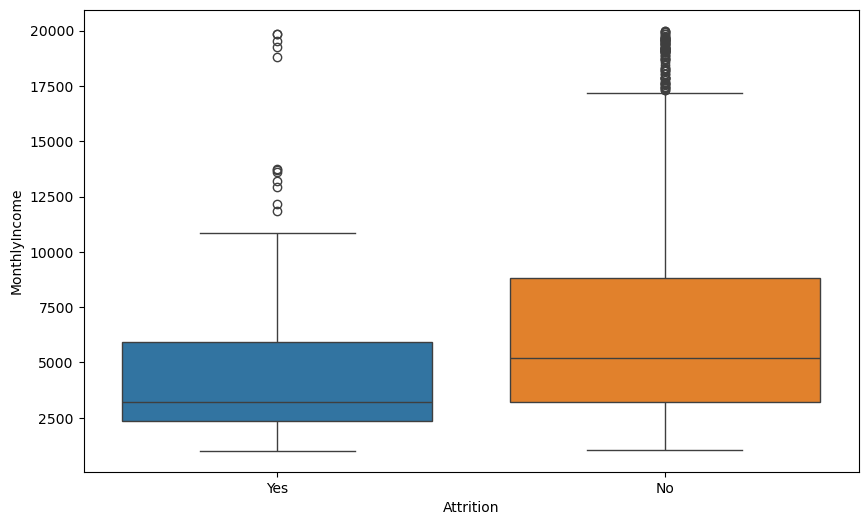

In [22]:
# Plot 1: Box plot of Attrition Rate by Monthly Income

plt.figure(figsize =(10, 6))
sns.boxplot(y ='MonthlyIncome',x ='Attrition',data=data_df1,hue="Attrition")

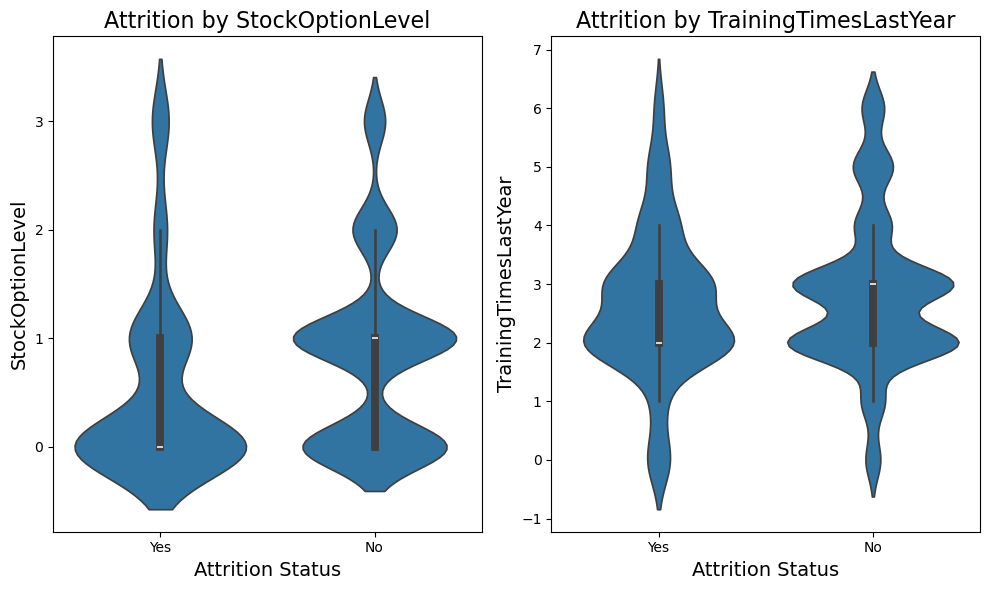

In [23]:
benefit_col = ['StockOptionLevel', 'TrainingTimesLastYear']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,6))

for i, col in enumerate(benefit_col):
    sns.violinplot(data=data_df1, x='Attrition', y=col, ax=axes[i])
    axes[i].set_title(f'Attrition by {col}',fontsize=16)
    axes[i].set_xlabel('Attrition Status',fontsize=14)
    axes[i].set_ylabel(col,fontsize=14)
    
plt.tight_layout()
plt.show()

Stock options have a positive impact on employee retention. Employees who own more shares tend to be more loyal and stay with the company longer. Training opportunities also play an important role in employee retention. Employees who have more training opportunities tend to be happier and more motivated to stay with the company.

#Exploring employee demographis such as distance from home and marital status , how these factors affect the attrition rate

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6)) df_dfh=data_df_encoded[['DistanceFromHome','Attrition']].groupby(['DistanceFromHome']).mean().sort_values(by='Attrition',ascending=False) #df_dfh=data_df[['DistanceFromHome','Attrition']].groupby(['DistanceFromHome']).mean().sort_values(by='Attrition',ascending=False) sns.lineplot(data=df_dfh, x='DistanceFromHome', y='Attrition', marker='o', ax=axes[0]) axes[0].set_title(f'Attrition Rate by Distance From Home') axes[0].set_xlabel('DistanceFromHome',fontsize=14) axes[0].set_ylabel('Attrition Rate (%)',fontsize=14)

#attrition_rate_df = attrition_rate_df.sort_values(by='AttritionRate', ascending=False) #df_ms=data_df_encoded[['MaritalStatus','Attrition']].groupby(['MaritalStatus']).mean().sort_values(by='Attrition',ascending=False) df_ms=data_df[['MaritalStatus','Attrition']].groupby(['MaritalStatus']).mean().sort_values(by='Attrition',ascending=False) sns.barplot(data=df_ms, x='MaritalStatus', y='Attrition', ax=axes[1]) axes[1].set_title(f'Attrition Rate by Marital Status') axes[1].set_xlabel('MaritalStatus',fontsize=14) axes[1].set_ylabel('Attrition Rate (%)',fontsize=14)

#PREPROCESSING THE DATA

#drop unneeded column: Over18, EmployeeCount, EmployeeNumber,and standardHours
#the minimum age is 18,so 'Over18' column can be dropped #The 'EmployeeCount' column consists of all 1's, std=0, we dont need this column #The same with 'StandardHours' column consits of all 40's, they are all identical indicated by the standard deviation being 0, we can drop this column as well #The 'EmployeeNumber' column is merely the number for each employee, we dont need the column


In [24]:
data_df2=data_df.copy()
data_df2['Attrition']=data_df2['Attrition'].apply(lambda x:0 if x=='No' else 1)
data_df2['Attrition']
#data_df.drop('EmployeeCount',axis=1,inplace=True)


0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [25]:
data_df2.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

data_df.shape

In [26]:
#drop unneeded columns/uniformed columns, useless features
data_df2.drop('EmployeeCount',axis=1,inplace=True)
data_df2.drop('StandardHours',axis=1,inplace=True)
data_df2.drop('EmployeeNumber',axis=1,inplace=True)
data_df2.drop('Over18',axis=1,inplace=True)

In [27]:
data_df2.shape

(1470, 31)

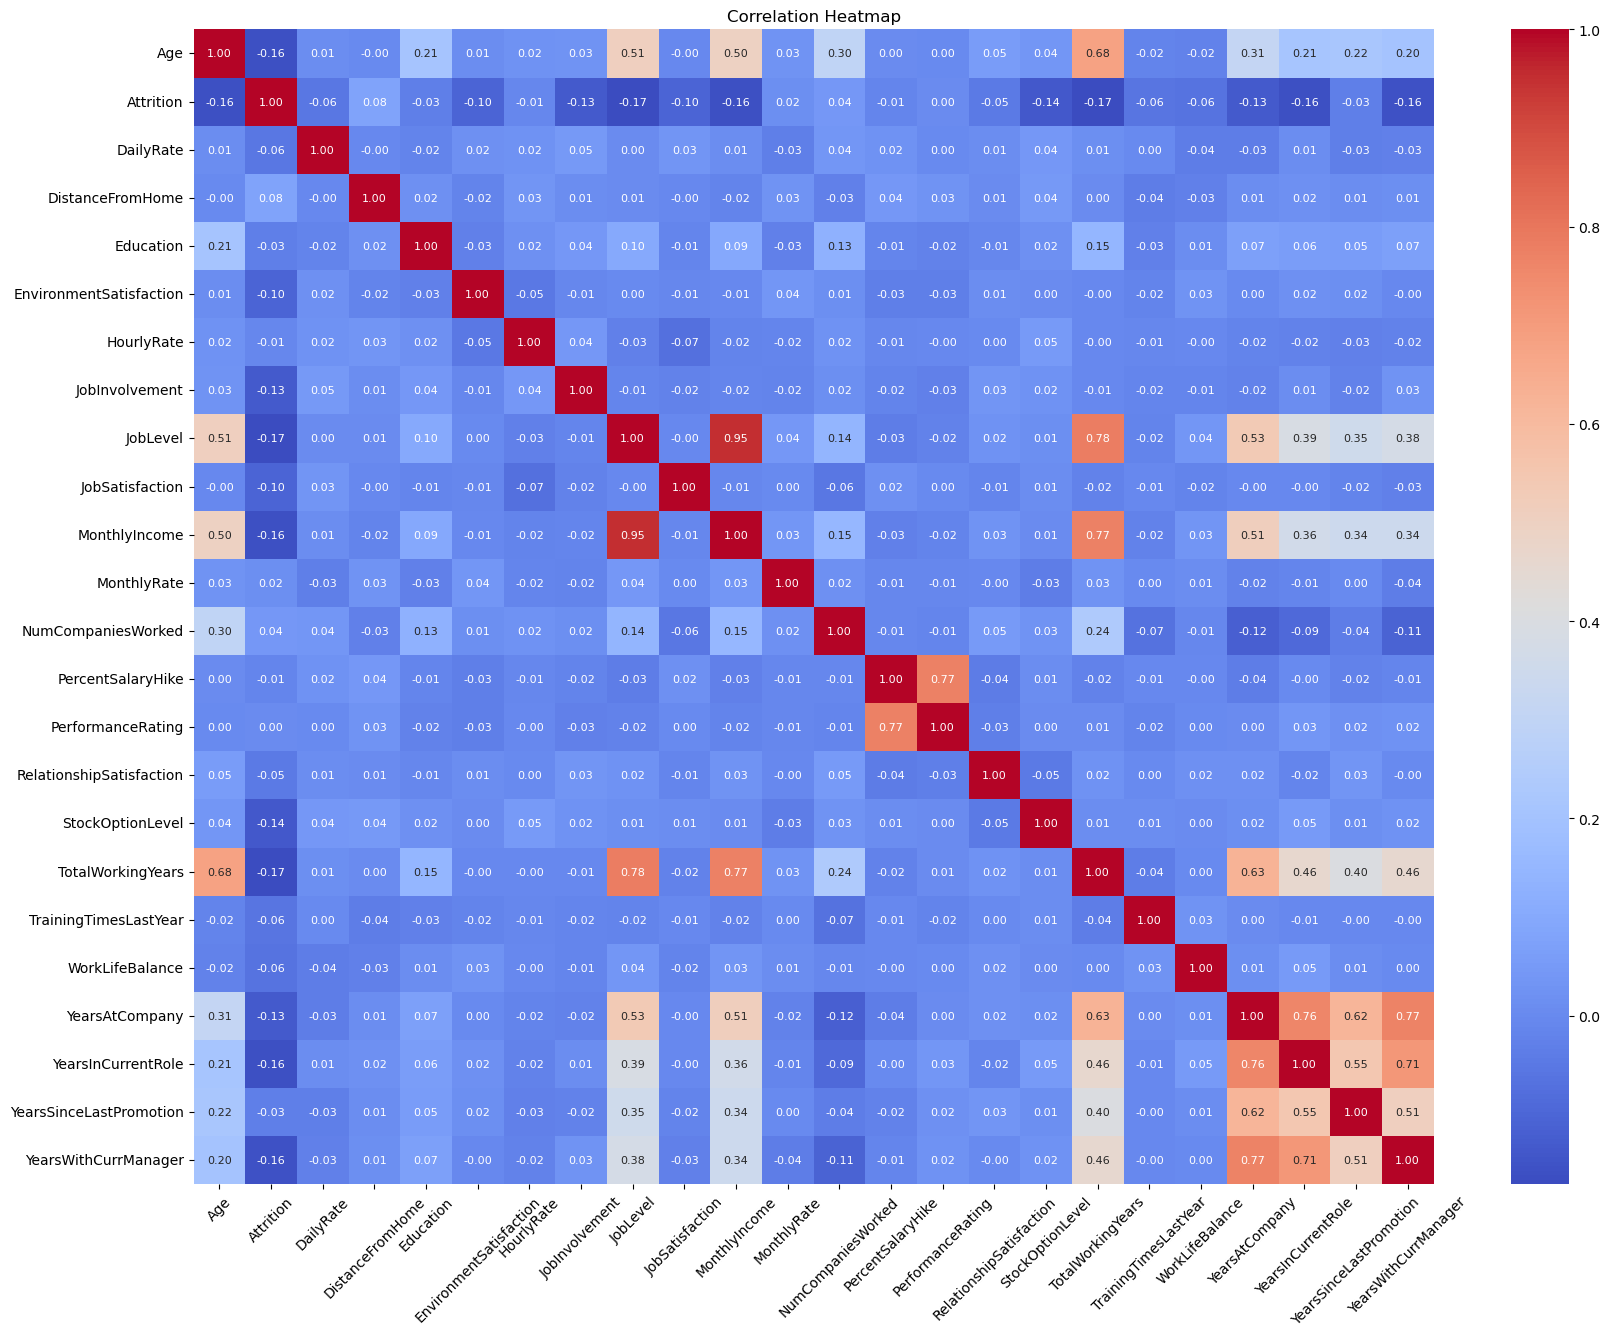

In [28]:
#What are the factors that contribute to Attrition?
#heatmap
corr_matrix=data_df2.loc[:,data_df2.dtypes=='int64'].corr()
plt.figure(figsize=(20, 15))  # Set the size of the heatmap
ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"fontsize": 8})
ax.set(title='Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0);

In [29]:
numeric_df = data_df2.select_dtypes(include='number')
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   DailyRate                 1470 non-null   int64
 3   DistanceFromHome          1470 non-null   int64
 4   Education                 1470 non-null   int64
 5   EnvironmentSatisfaction   1470 non-null   int64
 6   HourlyRate                1470 non-null   int64
 7   JobInvolvement            1470 non-null   int64
 8   JobLevel                  1470 non-null   int64
 9   JobSatisfaction           1470 non-null   int64
 10  MonthlyIncome             1470 non-null   int64
 11  MonthlyRate               1470 non-null   int64
 12  NumCompaniesWorked        1470 non-null   int64
 13  PercentSalaryHike         1470 non-null   int64
 14  PerformanceRating         1470 non-null 

<Axes: >

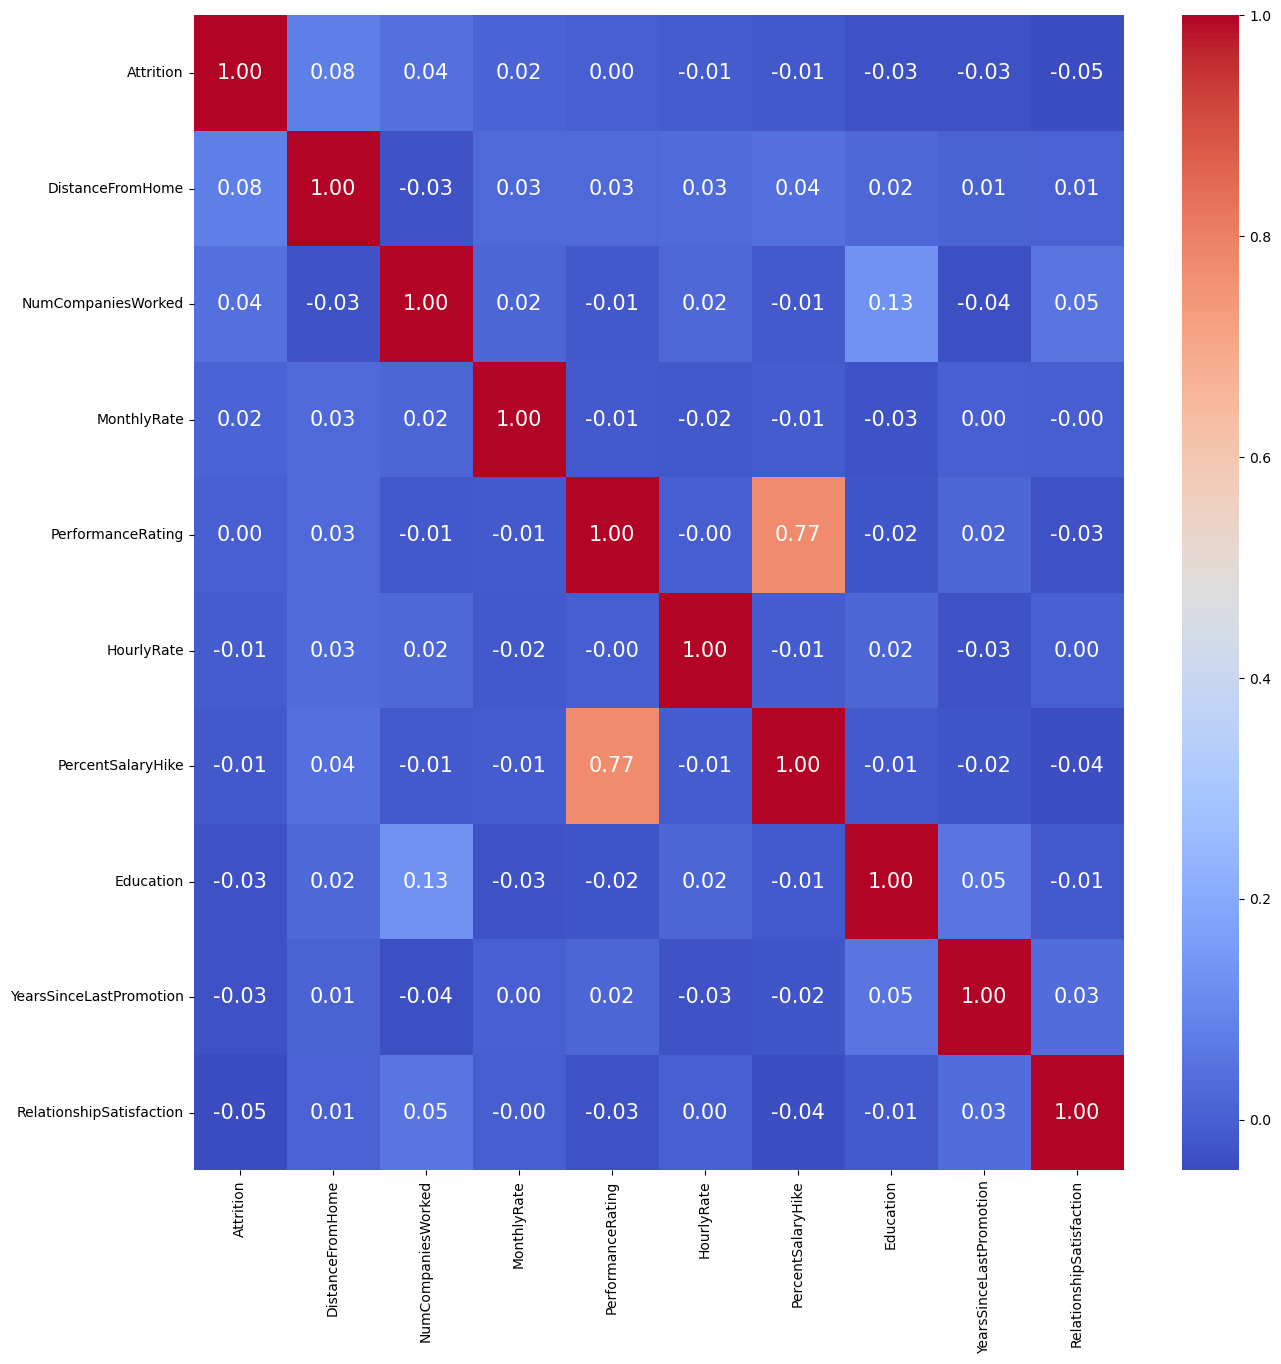

In [30]:
 #Selects 10 features that has the highest correlation to Attrition
col =numeric_df.corr().nlargest(10, "Attrition").Attrition.index
plt.figure(figsize=(15, 15))
sns.heatmap(numeric_df[col].corr(), annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size":15})

#these r top 10 factors influencing attrition rate: distanceFromHOme, NumCompaniesWorked, MonthlyRate, PerformanceRating, HourlyRate, PercentSalaryHike,Education,YearsSinceLastPromotion,RelationshipSatisfaction


In [31]:
#find the the top 10 features with highest correlation to Attrition using bargraph

/var/folders/2v/pzvg8pkj1vn_xm8_gssnch0c0000gn/T/ipykernel_1593/37508195.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot( x= cor_attr.index[1:], y= 'Attrition', data= cor_attr[1:], palette= palette)
/var/folders/2v/pzvg8pkj1vn_xm8_gssnch0c0000gn/T/ipykernel_1593/37508195.py:9: UserWarning: The palette list has more values (32) than needed (23), which may not be intended.
  ax = sns.barplot( x= cor_attr.index[1:], y= 'Attrition', data= cor_attr[1:], palette= palette)


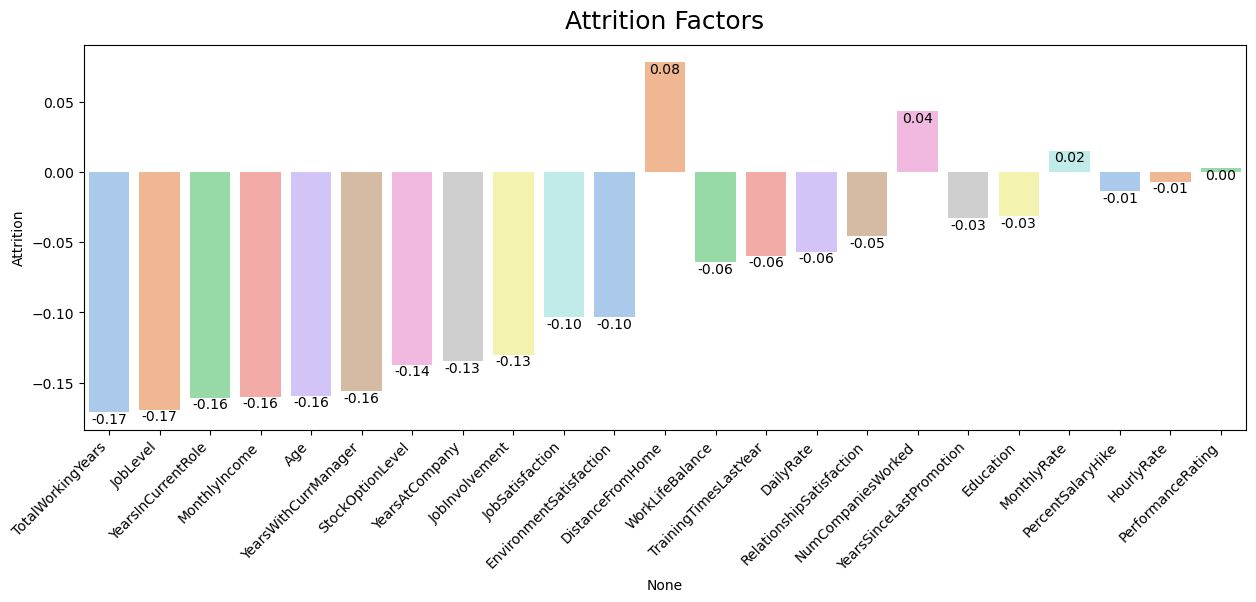

In [32]:
cor_attr = data_df2.loc[:, data_df2.dtypes == 'int64'].corr()[['Attrition']].sort_values(by='Attrition', ascending=False)

# sorts correlation values according to their numerical magnitudes
cor_attr = cor_attr.reindex(cor_attr['Attrition'].abs().sort_values(ascending=False).index)

# Visualizing the correlations on bargraph 
plt.figure(figsize=(15, 5))
palette = sns.color_palette('pastel', 32)
ax = sns.barplot( x= cor_attr.index[1:], y= 'Attrition', data= cor_attr[1:], palette= palette)
plt.xticks(rotation=45, ha='right')
ax.set_title('Attrition Factors', fontdict={'fontsize':18}, pad=12)

# Show bar values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='top')

In [33]:
#lets conduct correlation test to find out how "distance from home" and "job role" affect attrition

In [34]:
subset_df2=data_df2[['Attrition', 'DistanceFromHome', 'JobRole']]
subset_df2

,Attrition,DistanceFromHome,JobRole
0,1,1,Sales Executive
1,0,8,Research Scientist
2,1,2,Laboratory Technician
3,0,3,Research Scientist
4,0,2,Laboratory Technician
...,...,...,...
1465,0,23,Laboratory Technician
1466,0,6,Healthcare Representative
1467,0,4,Manufacturing Director
1468,0,2,Sales Executive


In [35]:
#correlation test between 'DistanceFromHome' and 'Attrition'
correlation = subset_df2['DistanceFromHome'].corr(subset_df2['Attrition'])
print("Correlation between DistanceFromHome and Attrition:", correlation)

Correlation between DistanceFromHome and Attrition: 0.07792358295570376


In [36]:
 #print the correlation coefficient between the two variables. Compare attrition rates across different job roles:
attrition_by_job_role = subset_df2.groupby('JobRole')['Attrition'].mean()
print(attrition_by_job_role)

JobRole
Healthcare Representative    0.068702
Human Resources              0.230769
Laboratory Technician        0.239382
Manager                      0.049020
Manufacturing Director       0.068966
Research Director            0.025000
Research Scientist           0.160959
Sales Executive              0.174847
Sales Representative         0.397590
Name: Attrition, dtype: float64


/var/folders/2v/pzvg8pkj1vn_xm8_gssnch0c0000gn/T/ipykernel_1593/1199750241.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=attrition_by_job_role.index, y=attrition_by_job_role.values, palette= palette)
/var/folders/2v/pzvg8pkj1vn_xm8_gssnch0c0000gn/T/ipykernel_1593/1199750241.py:4: UserWarning: The palette list has more values (32) than needed (9), which may not be intended.
  ax = sns.barplot(x=attrition_by_job_role.index, y=attrition_by_job_role.values, palette= palette)


"It subsets the DataFrame data_df2 to include only the columns 'Attrition', 'DistanceFromHome', and 'JobRole'.\nIt calculates the overall correlation between distance from home and attrition for the entire dataset.\nIt calculates the mean attrition rate by job role."

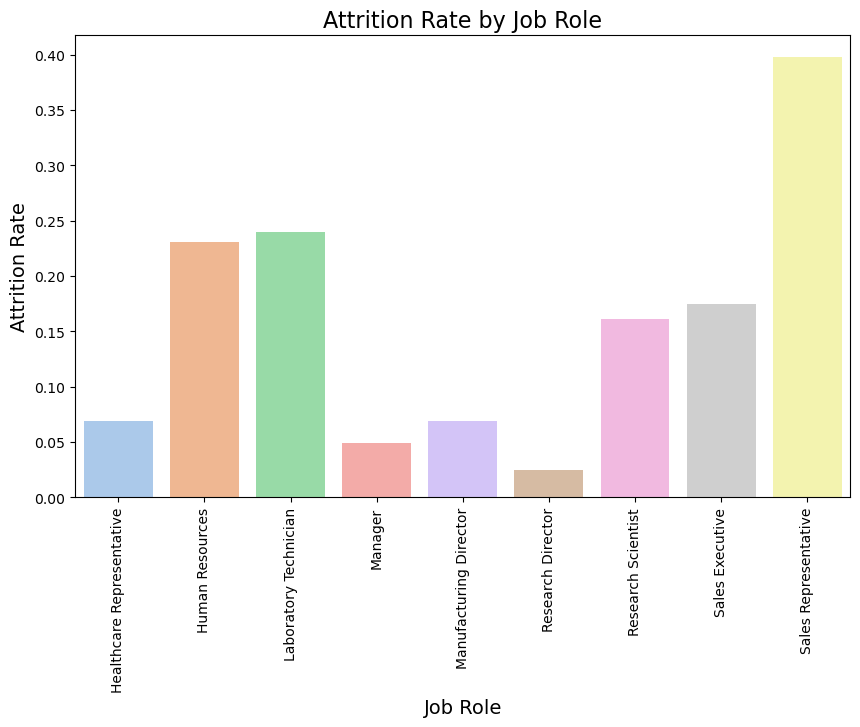

In [37]:
#Visualize the attrition rates by job role using a bar plot:
# Bar plot of attrition rates by job role
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=attrition_by_job_role.index, y=attrition_by_job_role.values, palette= palette)
ax.set_ylabel('Attrition Rate',fontsize=14)
plt.title('Attrition Rate by Job Role',fontsize=16)
plt.xlabel('Job Role',fontsize=14)
plt.xticks(rotation=90)

"""It subsets the DataFrame data_df2 to include only the columns 'Attrition', 'DistanceFromHome', and 'JobRole'.
It calculates the overall correlation between distance from home and attrition for the entire dataset.
It calculates the mean attrition rate by job role."""

/var/folders/2v/pzvg8pkj1vn_xm8_gssnch0c0000gn/T/ipykernel_1593/2615151999.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x= 'Jobrole', y= 'Correlation', data = distance_attrition, palette= palette )
/var/folders/2v/pzvg8pkj1vn_xm8_gssnch0c0000gn/T/ipykernel_1593/2615151999.py:16: UserWarning: The palette list has more values (32) than needed (9), which may not be intended.
  ax = sns.barplot(x= 'Jobrole', y= 'Correlation', data = distance_attrition, palette= palette )


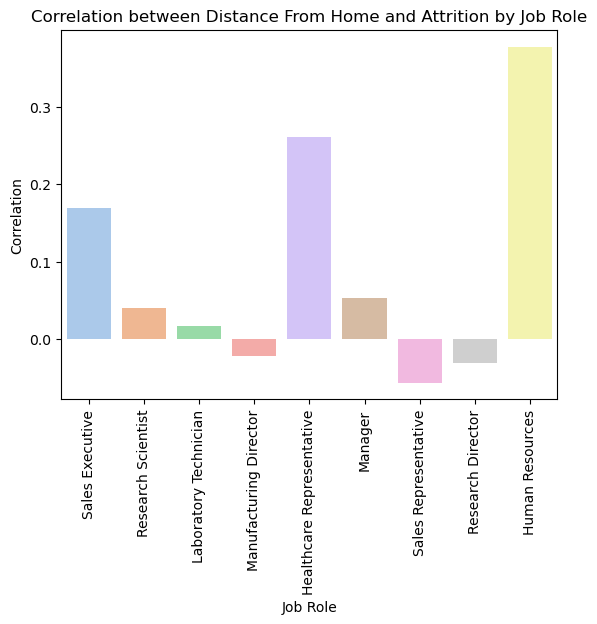

In [38]:
#It calculates the correlation between distance from home and attrition for each unique job role
job_roles = data_df2['JobRole'].unique()

correlations = {} 
for role in job_roles:
    
    subset = data_df2[data_df2['JobRole'] == role]
    # subset = Sales Executive, 0.1 , 1
    
    correlation = subset['DistanceFromHome'].corr(subset['Attrition'])
    
    # correlation = Sales Executiv 0.1698105188381547
    correlations[role] = correlation
     
distance_attrition = pd.DataFrame(list(correlations.items()), columns=['Jobrole', 'Correlation'])
ax = sns.barplot(x= 'Jobrole', y= 'Correlation', data = distance_attrition, palette= palette )
ax.set(title='Correlation between Distance From Home and Attrition by Job Role',
       xlabel='Job Role',
       ylabel='Correlation')
plt.xticks(rotation=90);

In [39]:
#Relationship between performance ratings and attrition
# Calculate the correlation coefficient between 'Attrition' and 'PerformanceRating'
correlation_coefficient = round(data_df2['Attrition'].corr(data_df2['PerformanceRating']), 3)
print(f"Correlation coefficient: {correlation_coefficient}")



Correlation coefficient: 0.003


Correlation coefficient: 0.003 is too close to zero, and it means a weak corelation between Employee Performance Ratings and Attrition.

In [40]:
# Calculate the Attrition ratios by PerformanceRating
pr_unique=data_df2['PerformanceRating'].unique() 
attr_value = 1
result_df= data_df2.groupby('PerformanceRating')['Attrition'].value_counts(normalize=True).loc[:, attr_value] * 100
result_df = result_df.reset_index()
result_df.columns = ['PerformanceRating','AttritionRate']
result_df

,PerformanceRating,AttritionRate
0,3,16.077170
1,4,16.371681


Performance Rating column has only 2 unique values which are 3 and 4

/var/folders/2v/pzvg8pkj1vn_xm8_gssnch0c0000gn/T/ipykernel_1593/1371204159.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot( x= 'PerformanceRating', y= 'AttritionRate', data= result_df, palette= palette)
/var/folders/2v/pzvg8pkj1vn_xm8_gssnch0c0000gn/T/ipykernel_1593/1371204159.py:3: UserWarning: The palette list has more values (32) than needed (2), which may not be intended.
  ax = sns.barplot( x= 'PerformanceRating', y= 'AttritionRate', data= result_df, palette= palette)


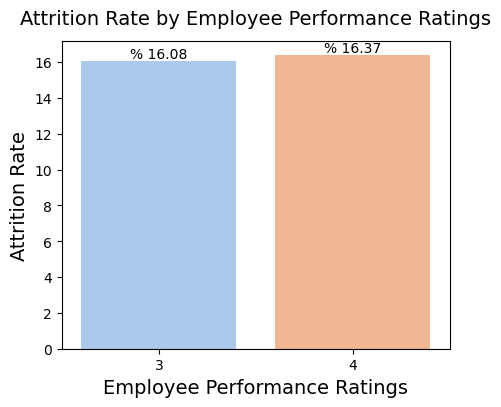

In [41]:
#Visualisation of Attrition rate by Performance Ratio
plt.figure(figsize=(5, 4))
ax = sns.barplot( x= 'PerformanceRating', y= 'AttritionRate', data= result_df, palette= palette)

plt.ylabel('Attrition Rate',fontsize=14)
plt.xlabel('Employee Performance Ratings',fontsize=14)
ax.set_title('Attrition Rate by Employee Performance Ratings', fontdict={'fontsize':14}, pad=12);

# Show bar values over them as percentage
for p in ax.patches:
    ax.annotate(f'% {p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

There r no significant difference in attrition rate between performanceRating=3 and performanceRating=4
Here we can say that performance rating has no effect on Attrition


In [42]:
#Preprocessing, prepare our data for model training

In [43]:
#the original dataset data_df has 4 irrelevant columns: EmployeeCount,
#EmployeeNumber, Over18, and StandardHour. Remove the columns  for more accuracy.
data_df.drop('EmployeeCount',axis=1,inplace=True)
data_df.drop('StandardHours',axis=1,inplace=True)
data_df.drop('EmployeeNumber',axis=1,inplace=True)
data_df.drop('Over18',axis=1,inplace=True)

In [44]:
data_df.shape

(1470, 31)

In [45]:
X=data_df
y=data_df.iloc[:,1]
X.drop('Attrition',axis=1,inplace=True)


In [46]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)

The dataset have 7 categorical data, we have to change them to int data by creating 7 dummy vars

In [47]:
dummy_BusinessTravel = pd.get_dummies(data_df['BusinessTravel'],prefix ='BusinessTravel')
dummy_Department = pd.get_dummies(data_df['Department'],prefix ='Department')
dummy_EducationField = pd.get_dummies(data_df['EducationField'],prefix ='EducationField')
dummy_Gender = pd.get_dummies(data_df['Gender'],prefix ='Gender',drop_first=True)
dummy_JobRole = pd.get_dummies(data_df['JobRole'],prefix ='JobRole')
dummy_MaritalStatus = pd.get_dummies(data_df['MaritalStatus'],prefix ='MaritalStatus')
dummy_OverTime = pd.get_dummies(data_df['OverTime'],prefix ='OverTime',drop_first=True)


In [48]:
# Adding these dummy variable to input X
X = pd.concat([X, dummy_BusinessTravel,dummy_Department,dummy_EducationField,dummy_Gender,dummy_JobRole,dummy_MaritalStatus,\
dummy_OverTime], axis = 1)


In [49]:
# Removing the categorical data
X.drop(['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime'],axis=1,inplace=True)


In [50]:
print(X.shape)
print(y.shape)

(1470, 49)
(1470,)


In [51]:
#Split data into train and test set

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 40, stratify=y)


Preprocessing is done, now we will apply the Random Forest classifier to the dataset

In [53]:
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [54]:
RF = RandomForestClassifier(n_estimators=10,criterion='entropy')
RF.fit(X_train,y_train)
y_pred=RF.predict(X_test)


In [55]:
def print_score(clf, X_train,y_train,X_test,y_test,train=True):
    if train:
        print("Train Result:")
        print("------------")
        print("Classification Report:\n {}\n".format(classification_report(y_train,clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train,clf.predict(X_train))))
        res=cross_val_score(clf,X_train,y_train,cv=10,scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy std: \t\t {0:.4f}".format(np.std(res)))
        print("------------------------------------------------------------------")
    elif train==False:
        print("Test Result:")
        print("------------")
        print("Classification Report:\n {}\n".format(classification_report(y_test,clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test,clf.predict(X_test))))
        print("Accuracy score: {0:.4f}".format(accuracy_score(y_test,clf.predict(X_test))))
        print("------------------------------------------------------------------")
print_score(RF,X_train,y_train,X_test,y_test,train=True)

Train Result:
------------
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       924
           1       0.99      0.86      0.92       178

    accuracy                           0.98      1102
   macro avg       0.98      0.93      0.95      1102
weighted avg       0.98      0.98      0.98      1102


Confusion Matrix: 
 [[923   1]
 [ 25 153]]

Average Accuracy: 	 0.8539
Accuracy std: 		 0.0179
------------------------------------------------------------------


In [56]:
print_score(RF,X_train,y_train,X_test,y_test,train=False)

Test Result:
------------
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       309
           1       0.88      0.12      0.21        59

    accuracy                           0.86       368
   macro avg       0.87      0.56      0.56       368
weighted avg       0.86      0.86      0.81       368


Confusion Matrix: 
 [[308   1]
 [ 52   7]]

Accuracy score: 0.8560
------------------------------------------------------------------


In [57]:
#Features Importance, Key features for deciding the resul

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


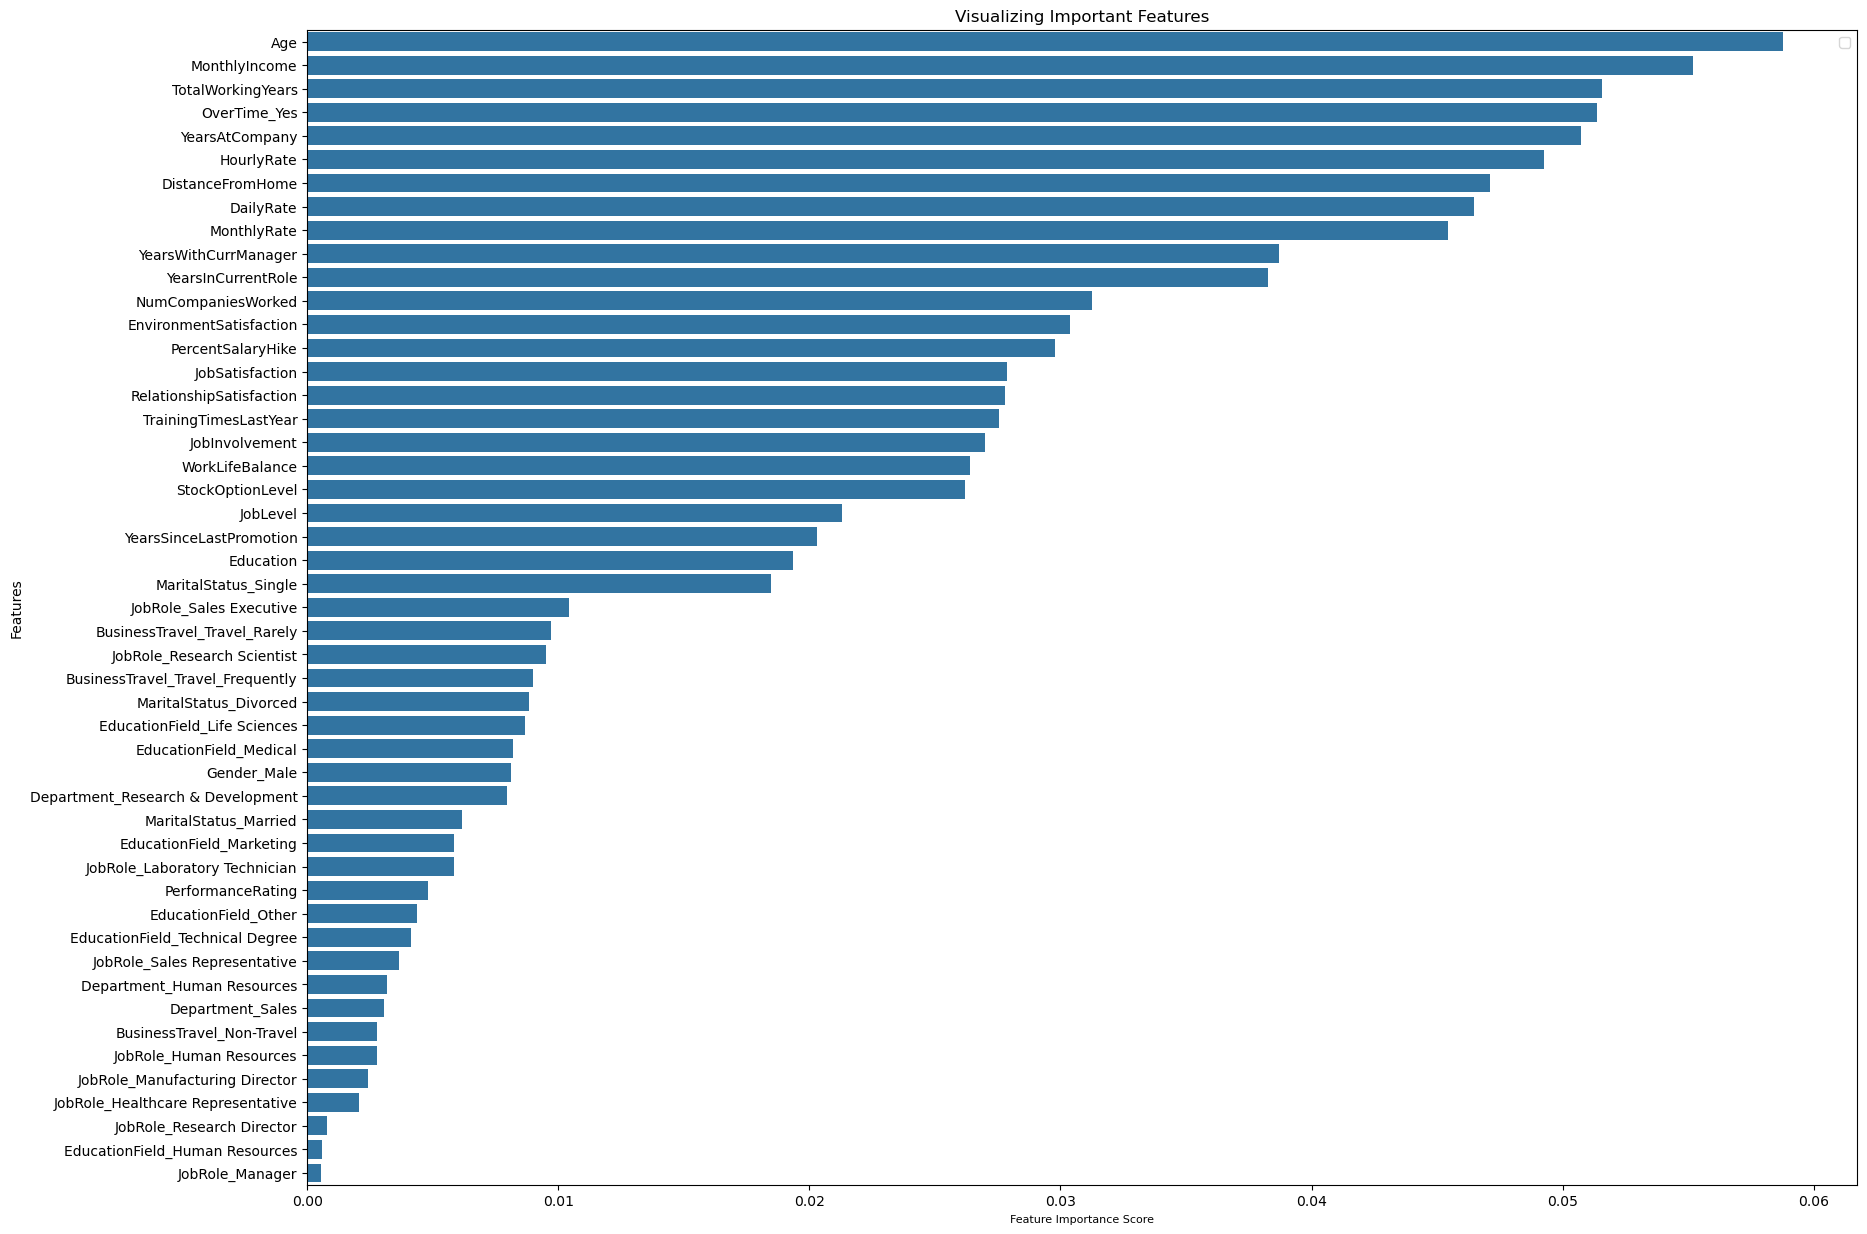

In [58]:
#pd.Series(RF.feature_importances,index = X.columns).sort_values(ascending=False).plot(kind=bar)
#feature_imp = pd.Series(RF.feature_importances_,index= X_train.columns).sort_values(ascending=False)
feature_imp = pd.Series(RF.feature_importances_,index= X.columns).sort_values(ascending=False)
# Creating a bar plot
#feature_imp=feature_imp[0:10,]
#feature_imp=feature_imp[0:20,]
feature_imp=feature_imp[0:49,]
plt.figure(figsize=(20,15))

sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score',fontsize=8)
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# According to Random Forest Classifier the top most important features are age, monthly income,years at company, hourly rate, distance from home etc
and the least imporant feature is JobRole_Manager

In [59]:
data_df.shape

(1470, 30)

In [61]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   HourlyRate                1470 non-null   int64 
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

there is 16.12% attrition rate. 83.88% employee stayed.